                     Shivaji University, Kolhapur
                       Department of Statistics
             M.Sc.(Applied Statistics and Informatics) Sem IV
          Practical-II: Hand-written Digit Recognition using CNN
          

-----------------------------------------------------------------------------------------------------

#### Q. Develop a CNN model to recognize hand-written digits in MNIST data set.

In [13]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

  Using cached tensorflow-2.9.1-cp37-cp37m-win_amd64.whl (444.0 MB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached grpcio-1.46.3-cp37-cp37m-win_amd64.whl (3.5 MB)
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=b5d54a7efc093d5d40b8e5f1e644e86344a219610be3dc43c4eec9bc114d5486
  Stored in directory: c:\users\laptech\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


Train:X=(60000, 28, 28) , y=(60000,)
Test:X=(10000, 28, 28) , y=(10000,)


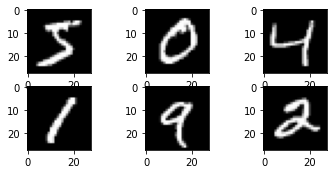

In [7]:
import matplotlib.pyplot as plt
print('Train:X=%s , y=%s' % (x_train.shape, y_train.shape))
print('Test:X=%s , y=%s' % (x_test.shape, y_test.shape))
for i in range(6):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
img_rows, img_cols=28, 28
if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 25

In [9]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [10]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [11]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.categorical_crossentropy,
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=12, batch_size=500)

Epoch 1/12
120/120 [==============================] - 139s 1s/step - loss: 0.3372 - accuracy: 0.9042
Epoch 2/12
120/120 [==============================] - 134s 1s/step - loss: 0.0813 - accuracy: 0.9773
Epoch 3/12
120/120 [==============================] - 142s 1s/step - loss: 0.0569 - accuracy: 0.9837
Epoch 4/12
120/120 [==============================] - 161s 1s/step - loss: 0.0456 - accuracy: 0.9872
Epoch 5/12
120/120 [==============================] - 162s 1s/step - loss: 0.0369 - accuracy: 0.9896
Epoch 6/12
120/120 [==============================] - 163s 1s/step - loss: 0.0321 - accuracy: 0.9906
Epoch 7/12
120/120 [==============================] - 163s 1s/step - loss: 0.0284 - accuracy: 0.9920
Epoch 8/12
120/120 [==============================] - 162s 1s/step - loss: 0.0248 - accuracy: 0.9927
Epoch 9/12
120/120 [==============================] - 162s 1s/step - loss: 0.0223 - accuracy: 0.9937
Epoch 10/12
120/120 [==============================] - 162s 1s/step - loss: 0.0192 - accura

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.021433565765619278
accuracy= 0.993399977684021
